# Análise exploratória de dados do Titanic

Abaixo está uma análise que fiz para treinar meus conceitos básicos de Ciência de Dados para teste no GT07

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm

In [2]:
titanic_data = pd.read_csv('data/Titanic-Dataset.csv', index_col=0)

In [3]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

Dados faltantes por coluna:
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


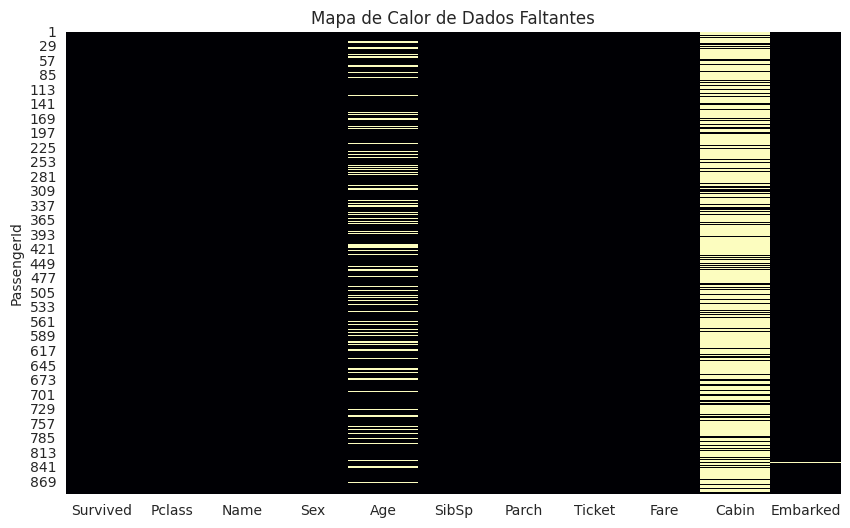

In [33]:
# Ver a quantidade de dados nulos em cada coluna
print("Dados faltantes por coluna:")
print(titanic_data.isnull().sum())

# Visualizando os nulos com um heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='magma')
plt.title("Mapa de Calor de Dados Faltantes")
plt.show()

In [6]:
titanic_data.drop(['Ticket','Cabin'], axis=1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S


In [7]:
titanic_data.dropna()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


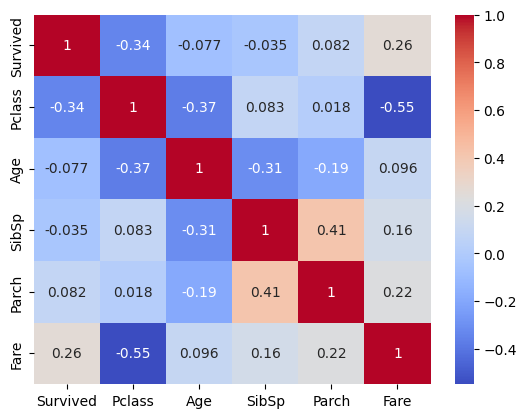

In [8]:
# Seleciona apenas as colunas numéricas antes de calcular a correlação
numeric_cols = titanic_data.select_dtypes(include='number')
sns.heatmap(numeric_cols.corr(), cmap="coolwarm", annot=True)
plt.show()

NOTAS: correlação significativa positiva entre valor do ingresso (Fare) e sobrevivência (Survived), e negativa entre classe do passageiro (Pclass) e sobrevivência (Survived) - quanto mais elitizado, mais sobreviveu.

Text(0.5, 1.0, 'Distribuição de Sobrevivência, (1 = Sobreviveu)')

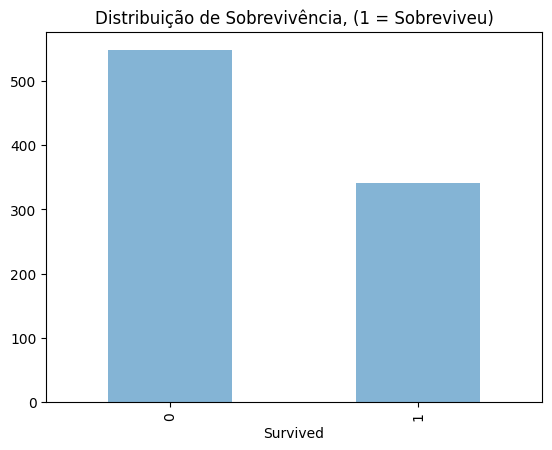

In [9]:
alpha=alpha_scatterplot = 0.2 #opacidade do scatterplot
alpha_bar_chart = 0.55 #opacidade do gráfico de barra
titanic_data.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart) #conta quantas pessoas sobreviveram, plota um gráfico
plt.title("Distribuição de Sobrevivência, (1 = Sobreviveu)") #título

Text(0.5, 1.0, 'Sobrevivência por idade, (1 = Sobreviveu)')

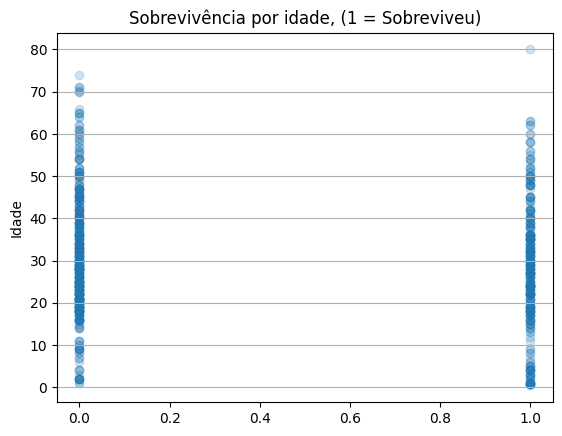

In [10]:
plt.scatter(titanic_data.Survived, titanic_data.Age, alpha=alpha_scatterplot)#faz um scatterplot para ver a relação entre Age e Survived
plt.ylabel("Idade")#rótulo eixo y
plt.grid(visible=True, which='major', axis='y')#adiciona linhas horizontais
plt.title("Sobrevivência por idade, (1 = Sobreviveu)")#titulo

Text(0.5, 1.0, 'Distribuição de Classe')

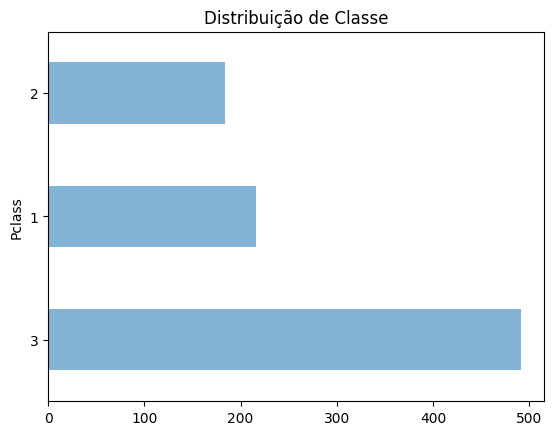

In [11]:
titanic_data.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)#conta os passageiros por classe, plota um barchart horizontal
plt.title("Distribuição de Classe")#titulo


Text(0.5, 1.0, 'Distrbuição de Idades por classes')

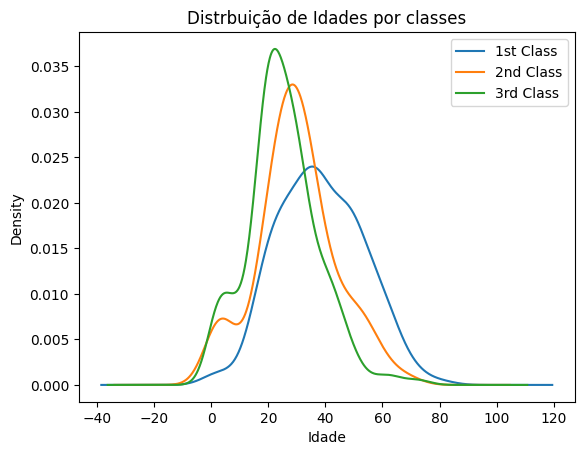

In [12]:
titanic_data.Age[titanic_data.Pclass == 1].plot(kind='kde')#Isso é feito para cada classe. Ele filtra os dados para uma classe de passageiro por vez e, em seguida, cria um gráfico de Estimativa de Densidade do Kernel (KDE). Um KDE é essencialmente um histograma suavizado, mostrando a distribuição de idades para cada classe.
titanic_data.Age[titanic_data.Pclass == 2].plot(kind='kde')
titanic_data.Age[titanic_data.Pclass == 3].plot(kind='kde')
plt.xlabel("Idade")#rotulo
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best')#legenda
plt.title("Distrbuição de Idades por classes")#titulo


Text(0.5, 1.0, 'Passageiros por local de embarque')

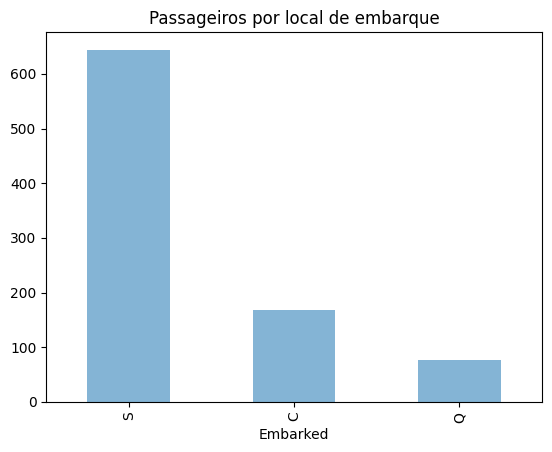

In [13]:
titanic_data.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)#conta os embarcados e plota um grafico
plt.title("Passageiros por local de embarque")#titulo

(-1.0, 2.0)

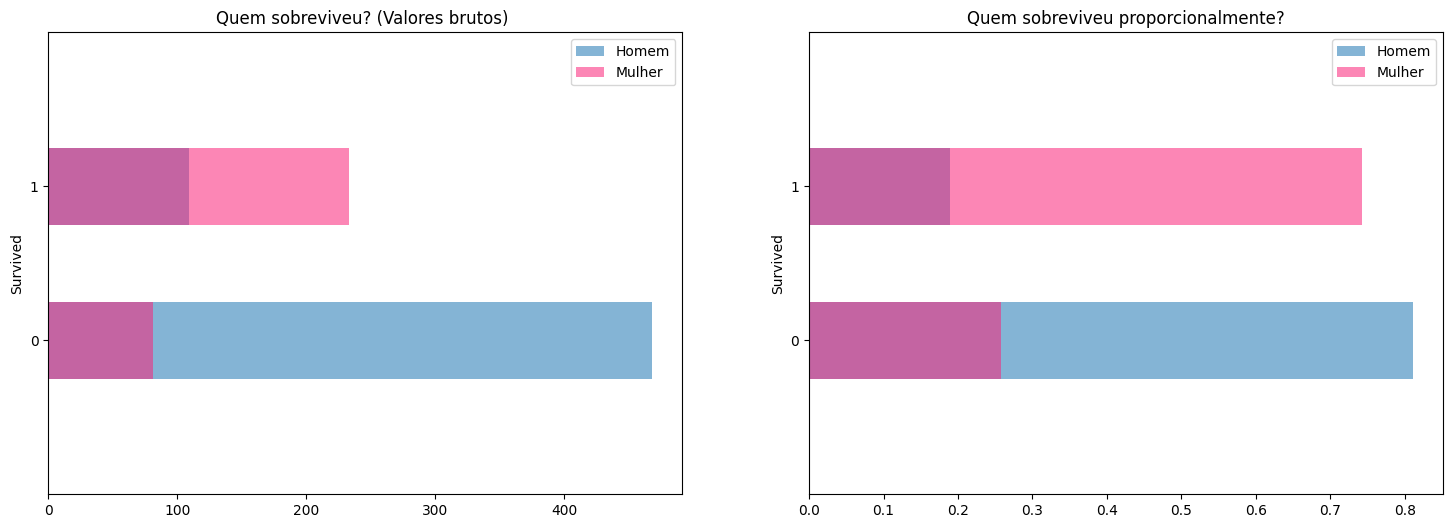

In [14]:
fig = plt.figure(figsize=(18,6))

#cria um plot de dois subsets, male and female, da variavel Survived.
#Depois disso a gente chama value_counts() para facilmente plotar o gráfico.
titanic_data_male = titanic_data.Survived[titanic_data.Sex == 'male'].value_counts().sort_index()
titanic_data_female = titanic_data.Survived[titanic_data.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
titanic_data_male.plot(kind='barh',label='Homem', alpha=0.55)
titanic_data_female.plot(kind='barh', color='#FA2379',label='Mulher', alpha=0.55)
plt.title("Quem sobreviveu? (Valores brutos) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2)

#ajustar o gráfico para demonstração proporcional
ax2 = fig.add_subplot(122)
(titanic_data_male/float(titanic_data_male.sum())).plot(kind='barh',label='Homem', alpha=0.55)
(titanic_data_female/float(titanic_data_female.sum())).plot(kind='barh', color='#FA2379',label='Mulher', alpha=0.55)
plt.title("Quem sobreviveu proporcionalmente?"); plt.legend(loc='best')

ax2.set_ylim(-1, 2)

É possível observar que tanto em números absolutos, mas especialmente em porcentagem, mais mulheres sobreviveram. (Aprox 75% das mulheres/25% dos homens)

Certo, agora vamos fazer uma análise da sobrevivência não só por sexo, mas também por classe:

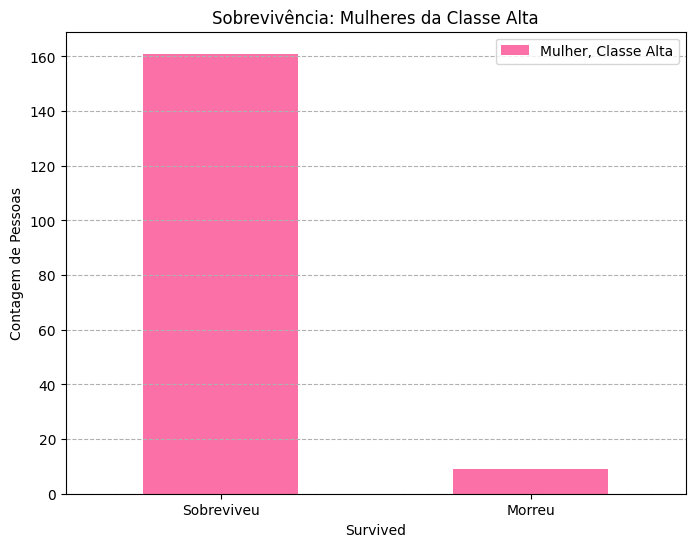

In [15]:
alpha_level = 0.65
plt.figure(figsize=(8, 6))
female_highclass = titanic_data.Survived[titanic_data.Sex == 'female'][titanic_data.Pclass != 3].value_counts() #mulheres de 1 e 2 classe
female_highclass.plot(kind='bar', label='Mulher, Classe Alta', color='#FA2479', alpha=alpha_level)
plt.xticks([0, 1], ["Sobreviveu", "Morreu"], rotation=0)
plt.ylabel("Contagem de Pessoas")
plt.title("Sobrevivência: Mulheres da Classe Alta")
plt.legend(loc='best')
plt.grid(axis='y', linestyle='--')

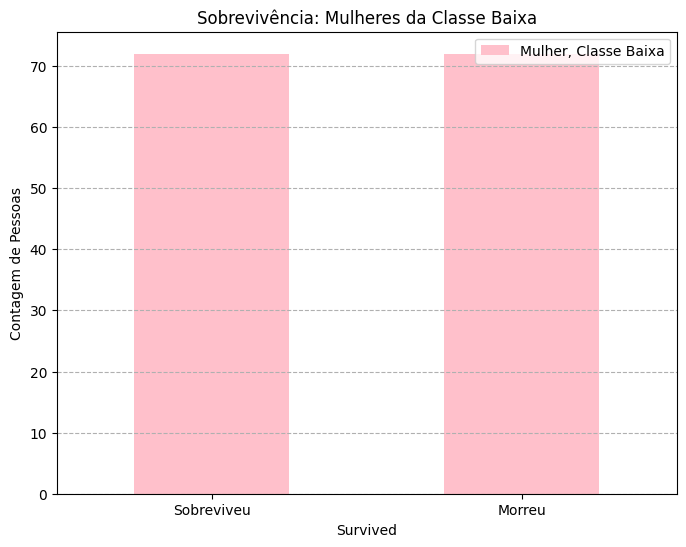

In [16]:
plt.figure(figsize=(8, 6))

female_lowclass = titanic_data.Survived[titanic_data.Sex == 'female'][titanic_data.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='Mulher, Classe Baixa', color='pink')
plt.xticks([0, 1], ["Sobreviveu", "Morreu"], rotation=0)
plt.ylabel("Contagem de Pessoas")
plt.title("Sobrevivência: Mulheres da Classe Baixa")
plt.legend(loc='best')
plt.grid(axis='y', linestyle='--')

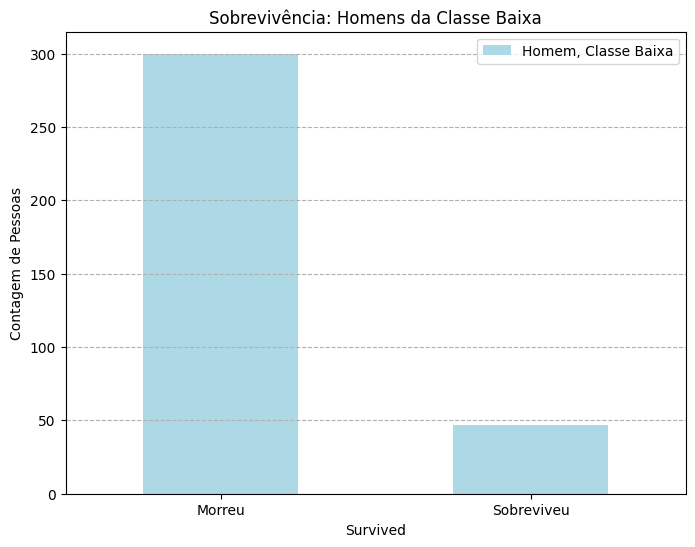

In [17]:
plt.figure(figsize=(8, 6))

male_lowclass = titanic_data.Survived[titanic_data.Sex == 'male'][titanic_data.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='Homem, Classe Baixa', color='lightblue')
plt.xticks([0, 1], ["Morreu", "Sobreviveu"], rotation=0)
plt.ylabel("Contagem de Pessoas")
plt.title("Sobrevivência: Homens da Classe Baixa")
plt.legend(loc='best')
plt.grid(axis='y', linestyle='--')

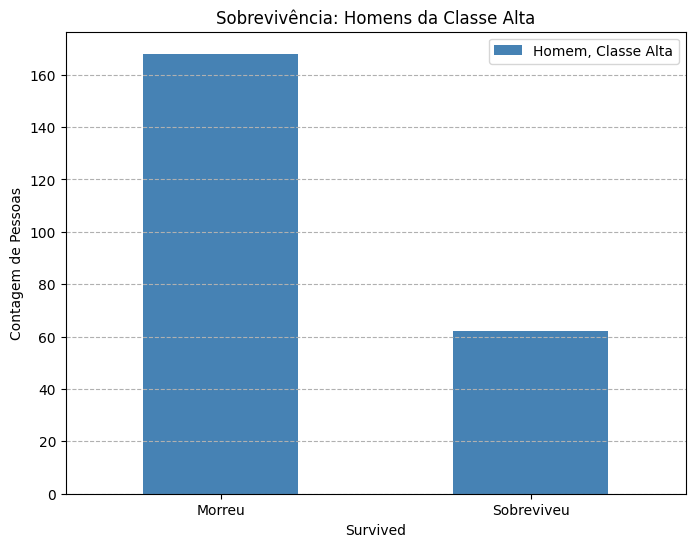

In [18]:
plt.figure(figsize=(8, 6))

male_highclass = titanic_data.Survived[titanic_data.Sex == 'male'][titanic_data.Pclass != 3].value_counts() #homens de 1 e 2 classe
male_highclass.plot(kind='bar', label='Homem, Classe Alta', color='steelblue')

plt.xticks([0, 1], ["Morreu", "Sobreviveu"], rotation=0)
plt.ylabel("Contagem de Pessoas")
plt.title("Sobrevivência: Homens da Classe Alta")
plt.legend(loc='best')
plt.grid(axis='y', linestyle='--')

Agora, vamos usar regressão logística para tentar entender quem sobreviveu no Titanic

In [19]:
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + C(Embarked)'
# fórmula do modelo
# aqui, o sinal ~ é um sinal =, e as características do nosso conjunto de dados
# são escritas como uma fórmula para prever a sobrevivência. A função C() permite que nossa
# regressão saiba que essas variáveis são categóricas.
# Ref: http://patsy.readthedocs.org/en/latest/formulas.html
results = {}
# cria um dicionário de resultados para armazenar nossos resultados de regressão para facilitar a análise posterior

In [20]:
y,X = dmatrices(formula, data=titanic_data, return_type='dataframe')
#cria um dataframe de regressão utilizando as funções dmatrices
model = sm.Logit(y, X)
res = model.fit()
results['Logit'] = [res, formula]
res.summary()


Optimization terminated successfully.
         Current function value: 0.444388
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Tue, 05 Aug 2025   Pseudo R-squ.:                  0.3414
Time:                        15:24:28   Log-Likelihood:                -316.40
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 5.992e-67
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.5423      0.474      9.583      0.000       3.613       5.471
C(Pclass)[T.2]      -1.2673      0.299     -4.245      0.000      -1.852      -0.682
C(Pclass)[T.3]      -2.4966      0.296     -8.422      0.000      -3.078      -1.916
C(Sex)[T.male]      -2.6239      0.218    -12.060      0.000      -3.050      -2.197
C(Embarked)[T.Q]    -0.8351      0.597     -1.398      0.162      -2.006       0.335
C(Embarked)[T.S]    -0.4254      0.271     -1.572      0.116      -0.956       0.105
Age                 -0.0436      0.008     -5.264      0.000      -0.060      -0.027
SibSp               -0.3697      0.123     -3.004      0.003      -0.611      -0.129
====================================================================================
"""

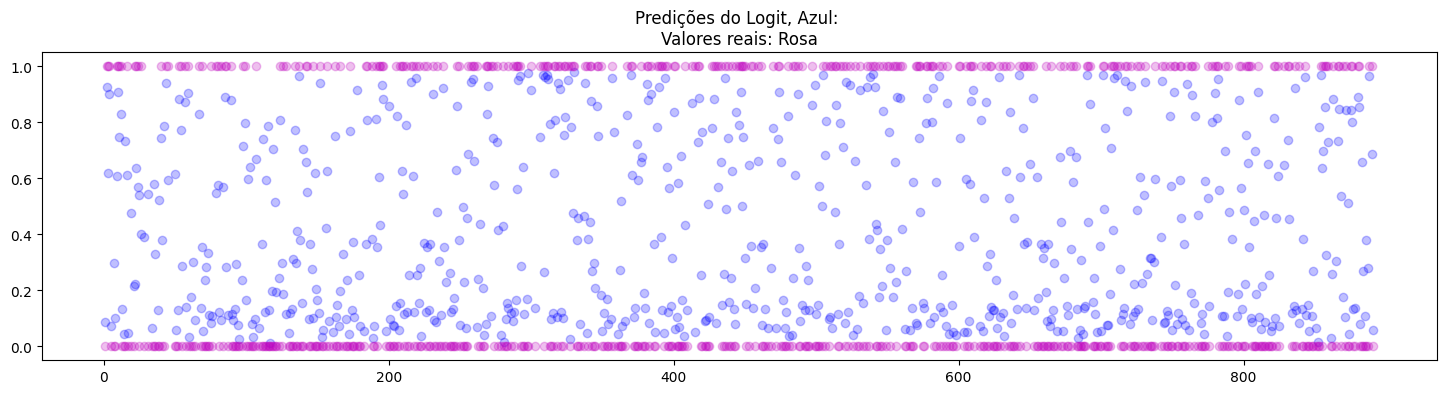

In [21]:
    # Plot Predictions Vs Actual
plt.figure(figsize=(18,4));
# generate predictions from our fitted model
ypred = res.predict(X)
plt.plot(X.index, ypred, 'bo', X.index, y, 'mo', alpha=.25);
plt.grid(color='white', linestyle='dashed')
plt.title('Predições do Logit, Azul: \nValores reais: Rosa');


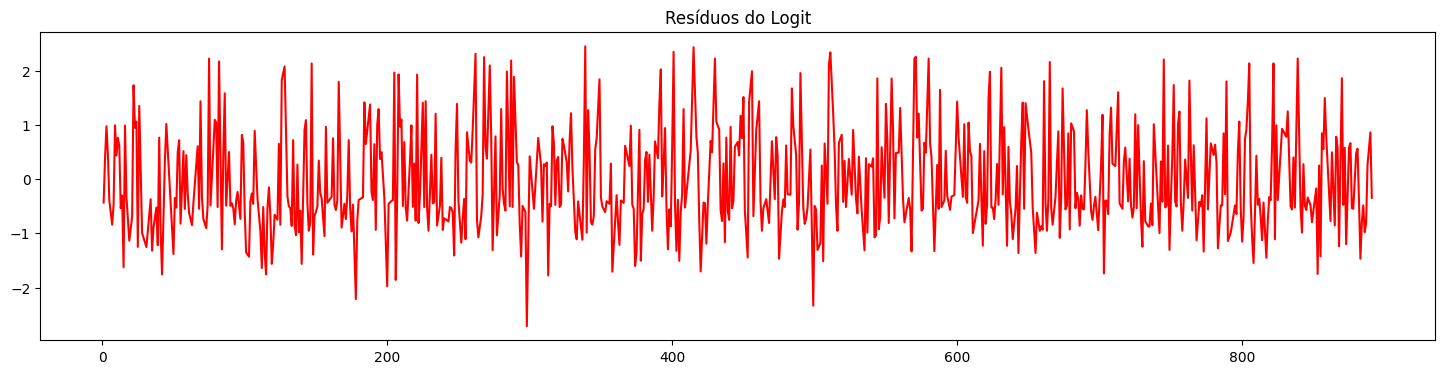

In [22]:
#Resíduos
plt.figure(figsize=(18,4));
plt.plot(res.resid_dev, 'r-')
plt.grid(color='white', linestyle='dashed')
plt.title('Resíduos do Logit');

Text(0.5, 1.0, 'Distribuição de nossas predições:')

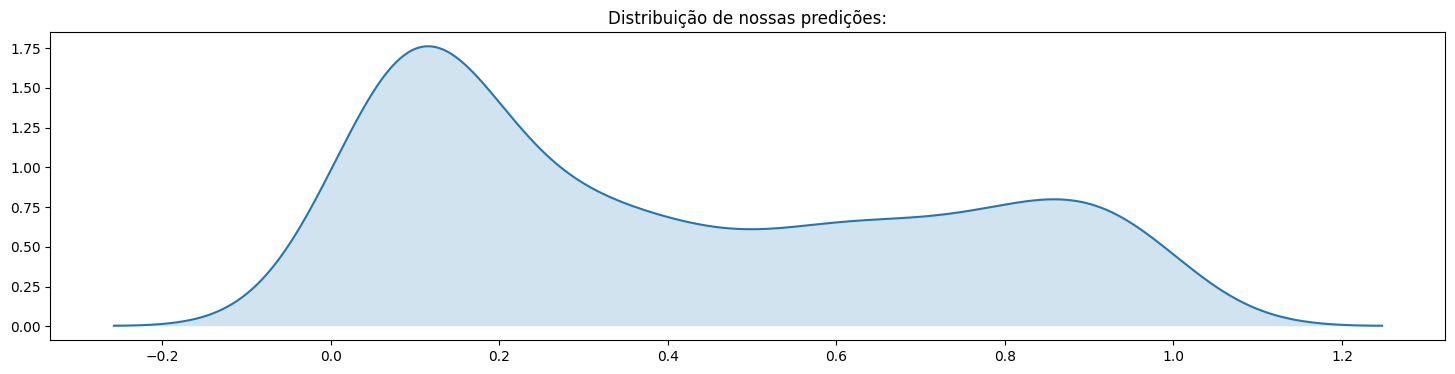

In [23]:
a = .2
fig = plt.figure(figsize=(18,4));
kde_res = KDEUnivariate(res.predict())
kde_res.fit()
plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support,kde_res.density, alpha=a)
plt.title("Distribuição de nossas predições:")

Text(0.5, 1.0, 'Chance de sobrevivência por gênero: (1 = Homem)')

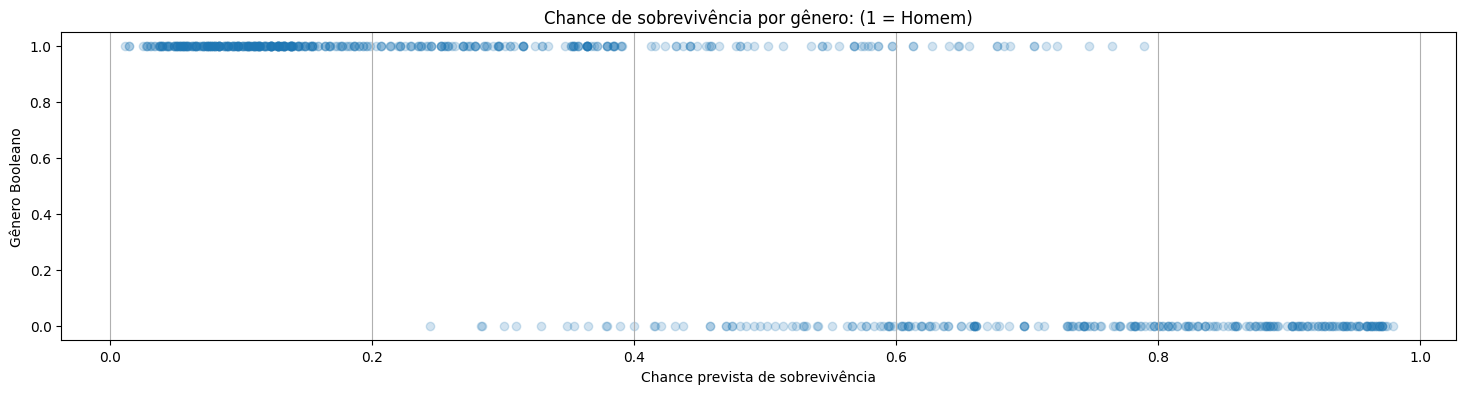

In [24]:
fig = plt.figure(figsize=(18,4));
plt.scatter(res.predict(),X['C(Sex)[T.male]'] , alpha=a)
plt.grid(visible=True, which='major', axis='x')
plt.xlabel("Chance prevista de sobrevivência")
plt.ylabel("Gênero Booleano")
plt.title("Chance de sobrevivência por gênero: (1 = Homem)")

Text(0.5, 1.0, 'Chance de sobrevivência da classe baixa (1 = 3rd Class)')

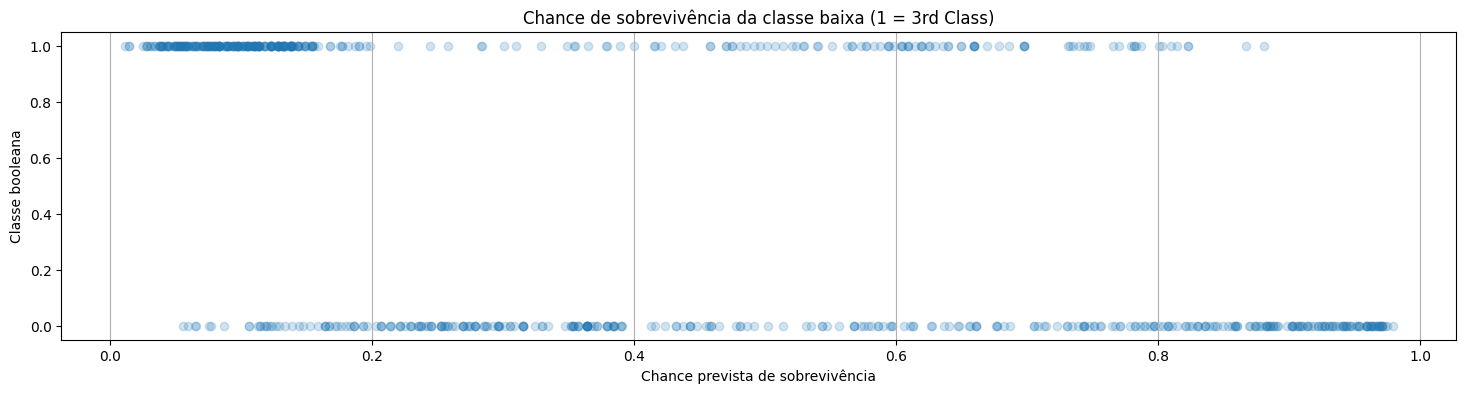

In [25]:
fig = plt.figure(figsize=(18,4));
plt.scatter(res.predict(),X['C(Pclass)[T.3]'] , alpha=a)
plt.xlabel("Chance prevista de sobrevivência")
plt.ylabel("Classe booleana")
plt.grid(visible=True, which='major', axis='x')
plt.title("Chance de sobrevivência da classe baixa (1 = 3rd Class)")

Text(0, 0.5, 'Idade')

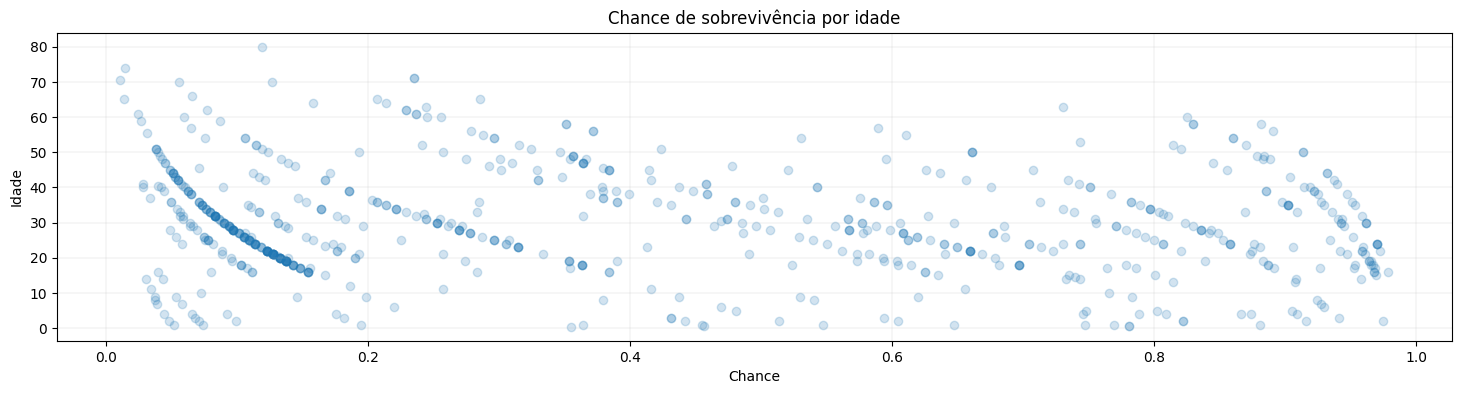

In [26]:
fig = plt.figure(figsize=(18,4));
plt.scatter(res.predict(),X.Age , alpha=a)
plt.grid(True, linewidth=0.15)
plt.title("Chance de sobrevivência por idade")
plt.xlabel("Chance")
plt.ylabel("Idade")